<h1><center><b>Lectura de Datos</b></h1></center>
<h4><center> Manuel Julio Romero Olvera &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; A01752662  </h4></center>

<h4><center> Cristian Gonzaga López &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  A01745134 </h4></center>

## Librerias

In [1]:
from pathlib import Path

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory

import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np
import pandas as pd

## Lectura de Datos

Primeramente obtenemos las imagenes desde kaggle, esto se hizo previamente de la siguiente manera:


In [2]:
from google.colab import files
files.upload() #aqui sube su API de kaggle en formato .json 

{}

In [3]:
! pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d imbikramsaha/food11
!unzip food11.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.8/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open food11.zip, food11.zip.zip or food11.zip.ZIP.


Creamos la ruta a cada folder tanto de test como de train

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
data_dir_test = Path('/content/drive/Shareddrives/Cleto_Gonzaga/food11/test')
data_dir_train = Path('/content/drive/Shareddrives/Cleto_Gonzaga/food11/train')

Guardamos en una lista las clases, en orden

In [10]:
!ls test 

ls: cannot access 'test': No such file or directory


In [11]:
clases = ['apple_pie', 'cheesecake', 'chicken_curry', 'french_fries', 
          'fried_rice', 'hamburger', 'hot_dog', 'ice_cream', 'omelette', 'pizza', 'sushi']

Usando la funcion *image_dataset_from_directory* obtenemos un BatchDataset, definimos la imagen de tamaño (128,128) debido a que era el maximo que logramos obtener evitando quedarnos sin memoria, el paraemtro shuffle se pone como false, para evitar que ordene las clases en orden alfabetico.

In [12]:
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='categorical',
    class_names=clases,
    image_size=(128,128), 
    batch_size=32,
    shuffle=False
    )

ds_test = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    labels='inferred',
    label_mode='categorical',
    class_names=clases,
    image_size=(128,128),
    batch_size=32,
    shuffle=False
    )

Found 9910 files belonging to 11 classes.
Found 1100 files belonging to 11 classes.


Las siguientes lineas de código obtenidas de [este sitio web](https://stackoverflow.com/questions/70583893/consistent-extraction-of-data-from-tensorflow-dataset) nos ayudan a convertir el BatchDataset en un array de numpy

In [13]:
train_images = np.concatenate(list(ds_train.map(lambda x, y: x)))
train_labels = np.concatenate(list(ds_train.map(lambda x, y: y)))

test_images = np.concatenate(list(ds_test.map(lambda x, y: x)))
test_labels = np.concatenate(list(ds_test.map(lambda x, y: y)))

Las imagenes vienen con valores de 0 a 255, para pasarlas de 0 a 1 las dividimos entre 255

In [14]:
train_images = train_images/255.0 
test_images = test_images/255.0

Los labels vienen como array booleano el cual indica la clase a la que pertenece, para convertirlo a un numero usamos el metodo argwhere, despues tomamos la transpuesta para que concuerde con nuestros datos y solo tomamos el primer valor ya que el segundo es el tipo de dato.

In [15]:
test_labels = np.argwhere(test_labels).T[1]
train_labels = np.argwhere(train_labels).T[1]

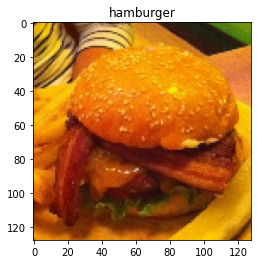

In [16]:
plt.imshow(train_images[4511])
label = clases[train_labels[4511]]
plt.title(label);

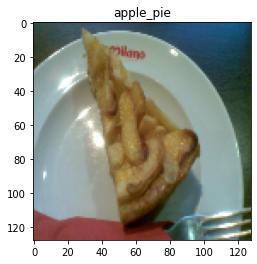

In [17]:
plt.imshow(test_images[4])
label = clases[test_labels[4]]
plt.title(label);

Guardamos los arrays como archivos .npy para evitar hacer todo lo de arriba, y solo cargar los datos

In [18]:
#np.save('train_images',train_images)
#np.save('test_images',test_images)

#np.save('train_labels',train_labels)
#np.save('test_labels',test_labels)